utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "🗂 Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.


•Si richiede di verificare le dimensioni del dataset e le diciture presenti nell'intestazione; 

•Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente; 

•Sempre riguardo i casi di COVID totali, si chiede di sviluppare una funzione che prenda in input il dataset e due nomi di continenti, e che ne confronti i seguenti relativi descrittori statistici: valori minimo e massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente); 

---VECCHIE RICHIESTE
•Si chiede poi di effettuare lo stesso tipo di analisi – anche in questo caso sviluppando una funzione ad hoc – per il numero di vaccinazioni totali per ogni continente; 

•Alla fine, basandosi sui calcoli fatti, il committente chiede di stilare un breve (tre o quattro righe) paragrafo testuale riassuntivo sulle statistiche di casi e vaccinazioni, che si concentri solo sulle differenze esistenti tra Europa, Sud America e Oceania.


---NUOVE RICHIESTE

•Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

•Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

•Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.


In [1]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

In [2]:
covid = pd.read_csv('owid-covid-data.csv')
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387218,ZWE,Africa,Zimbabwe,2024-03-13,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387219,ZWE,Africa,Zimbabwe,2024-03-14,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387220,ZWE,Africa,Zimbabwe,2024-03-15,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387221,ZWE,Africa,Zimbabwe,2024-03-16,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [3]:
covid.shape

(387223, 67)

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387223 entries, 0 to 387222
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387223 non-null  object 
 1   continent                                   368708 non-null  object 
 2   location                                    387223 non-null  object 
 3   date                                        387223 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [6]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.483330e+05,3.762800e+05,3.750500e+05,3.261090e+05,376589.000000,375359.000000,348333.000000,376280.000000,375050.000000,326109.000000,...,222614.000000,147316.000000,265566.000000,356661.000000,291623.000000,3.872230e+05,1.317200e+04,13172.000000,13172.000000,13172.000000
mean,7.386532e+06,8.728781e+03,8.756916e+03,8.996469e+04,78.157939,78.405166,112347.967657,132.572340,133.002194,918.307054,...,32.910930,50.791490,3.097389,73.711568,0.722553,1.291081e+08,5.571563e+04,9.763578,10.992424,1772.580448
std,4.398509e+07,2.397048e+05,9.038526e+04,4.566992e+05,1424.517554,534.387547,160036.519608,1544.311765,571.529927,1131.569486,...,13.572787,31.953565,2.548272,7.395040,0.148998,6.628902e+08,1.556166e+05,12.025551,24.595139,1987.607815
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.448000e+03,0.000000e+00,0.000000e+00,1.360000e+02,0.000000,0.000000,2954.509000,0.000000,0.000000,65.307000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.768998e+02,2.057500,-1.490000,119.531875
50%,7.971300e+04,0.000000e+00,1.700000e+01,1.393000e+03,0.000000,0.143000,32240.542000,0.000000,4.197000,414.035000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.669150e+03,8.150000,5.660000,1245.880250
75%,8.516680e+05,0.000000e+00,4.024290e+02,1.257300e+04,0.000000,4.000000,155233.877000,0.000000,68.598000,1453.121000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.879063e+04,15.040000,15.710000,2872.872875
max,7.749544e+08,4.423623e+07,6.319461e+06,7.040264e+06,103719.000000,14817.000000,765370.756000,240325.866000,34332.267000,6485.570000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.327828e+06,78.080000,377.700000,10293.515000


In [8]:
covid.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [9]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

•Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [121]:
ncasi_continente = covid.groupby('continent')['total_cases'].sum()
ncasi_continente

continent
Africa           1.277678e+10
Asia             2.099663e+11
Europe           2.013888e+11
North America    1.096626e+11
Oceania          9.506027e+09
South America    6.384417e+10
Name: total_cases, dtype: float64

•Sempre riguardo i casi di COVID totali, si chiede di sviluppare una funzione che prenda in input il dataset e due nomi di continenti, e    che ne confronti i seguenti relativi descrittori statistici: valori minimo e massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [74]:
dataset = input('Inserisci il nome del dataset: ')
continente1 = input('Inserisci il nome del primo continente: ')
continente2 = input('Inserisci il nome del secondo continente: ')

#definisco la funzione
def confronta_statistiche_continente(covid, continente1, continente2):

    #filtro i dati in base ai due continenti indicati in imput
    casi_continente1 = covid.loc[covid['continent'] == continente1, 'total_cases']
    casi_continente2 = covid.loc[covid['continent'] == continente2, 'total_cases']

    #calcolo i descrittori statistici
    minimo = (casi_continente1.min(), casi_continente2.min())
    massimo = (casi_continente1.max(), casi_continente2.max())
    media = (casi_continente1.mean().round(2), casi_continente2.mean().round(2))
    #calcolo la percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)
    casi_totali_mondo = covid['total_cases'].sum()
    casi_senza_continente = covid.loc[covid['continent'].isna(), 'total_cases'].sum()
    percentuale_rispetto_al_mondo = (
        (casi_continente1.sum() + casi_continente2.sum() + casi_senza_continente) / casi_totali_mondo * 100
    ).round(1)


# Stampa i risultati anziché restituirli
    print('Descrittori statistici per', continente1, 'e', continente2, ':')
    print('Minimo:', minimo)
    print('Massimo:', massimo)
    print('Media:', media)
    print('Percentuale dei casi totali nel mondo per', continente1, 'e', continente2, ':', percentuale_rispetto_al_mondo)

# Eseguo la funzione con i nomi dei continenti e il dataset inseriti dall'utente in imput
confronta_statistiche_continente(covid, continente1, continente2)

Inserisci il nome del dataset:  covid
Inserisci il nome del primo continente:  Europe
Inserisci il nome del secondo continente:  South America


Descrittori statistici per Europe e South America :
Minimo: (1.0, 1.0)
Massimo: (38997490.0, 37519960.0)
Media: (2669240.02, 3108587.4)
Percentuale dei casi totali nel mondo per Europe e South America : 86.7


In [39]:
#verifica
casi_continente1 = covid.loc[covid['continent'] == 'Asia', 'total_cases'].sum()
casi_continente1

209966253167.0

In [40]:
#verifica
casi_continente2 = covid.loc[covid['continent'] == 'Europe', 'total_cases'].sum()
casi_continente2

201388821111.0

In [41]:
#verifica
casi_senza_continente = covid.loc[covid['continent'].isna(), 'total_cases'].sum()
casi_senza_continente

1965828052628.0

In [42]:
#verifica
casi_totali_mondo = covid['total_cases'].sum()
casi_totali_mondo

2572972698038.0

In [46]:
#verifica
tot_casi_per_continenti_indicati = casi_continente1+casi_continente2+casi_senza_continente
tot_casi_per_continenti_indicati

2377183126906.0

In [69]:
#verifica
percentuale = (tot_casi_per_continenti_indicati/casi_totali_mondo *100).round(1)
percentuale

92.4

•Si chiede poi di effettuare lo stesso tipo di analisi – anche in questo caso sviluppando una funzione ad hoc – per il numero di vaccinazioni totali per ogni continente;

In [75]:
dataset = input('Inserisci il nome del dataset: ')
continente1 = input('Inserisci il nome del primo continente: ')
continente2 = input('Inserisci il nome del secondo continente: ')

#definisco la funzione
def confronta_vaccinazioni_continente(covid, continente1, continente2):

    #filtro i dati in base ai due continenti indicati in imput
    vaccinazioni_continente1 = covid.loc[covid['continent'] == continente1, 'total_vaccinations']
    vaccinazioni_continente2 = covid.loc[covid['continent'] == continente2, 'total_vaccinations']

    #calcolo i descrittori statistici
    minimo = (vaccinazioni_continente1.min(), vaccinazioni_continente2.min())
    massimo = (vaccinazioni_continente1.max(), vaccinazioni_continente2.max())
    media = (vaccinazioni_continente1.mean().round(2), vaccinazioni_continente2.mean().round(2))
    somma_tot_continente1 = vaccinazioni_continente1.sum()
    somma_tot_continente2 = vaccinazioni_continente2.sum()
    #calcolo la percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)
    vacc_totali_mondo = covid['total_vaccinations'].sum()
    vacc_senza_continente = covid.loc[covid['continent'].isna(), 'total_vaccinations'].sum()
    percentuale_rispetto_al_mondo = (
        (vaccinazioni_continente1.sum() + vaccinazioni_continente2.sum() + vacc_senza_continente) / vacc_totali_mondo * 100
    ).round(1)


# Stampa i risultati anziché restituirli
    print('Descrittori statistici per', continente1, 'e', continente2, ':')
    print('Minimo:', minimo)
    print('Massimo:', massimo)
    print('Media:', media)
    print('Somma delle vaccinazioni totali del continente', continente1, ':', somma_tot_continente1)
    print('Somma delle vaccinazioni totali del continente', continente2, ':', somma_tot_continente2)
    print('Percentuale delle vaccinazioni totali nel mondo per', continente1, 'e', continente2, ':', percentuale_rispetto_al_mondo)

# Eseguo la funzione con i nomi dei continenti e il dataset inseriti dall'utente in imput
confronta_vaccinazioni_continente(covid, continente1, continente2)

Inserisci il nome del dataset:  covid
Inserisci il nome del primo continente:  Europe
Inserisci il nome del secondo continente:  Oceania


Descrittori statistici per Europe e Oceania :
Minimo: (0.0, 0.0)
Massimo: (192221468.0, 69306345.0)
Media: (27185829.47, 12618282.01)
Somma delle vaccinazioni totali del continente Europe : 726731593437.0
Somma delle vaccinazioni totali del continente Oceania : 26056752359.0
Percentuale delle vaccinazioni totali nel mondo per Europe e Oceania : 87.1


In [72]:
#verifica
vaccinazioni_continente1 = covid.loc[covid['continent'] == 'Asia', 'total_vaccinations'].sum()
vaccinazioni_continente1

4418733146017.0

In [70]:
#verifica
vaccinazioni_continente2 = covid.loc[covid['continent'] == 'Europe', 'total_vaccinations'].max()
vaccinazioni_continente2

192221468.0

In [84]:
vacc_totali_mondo = covid['total_vaccinations'].sum()
vacc_totali_mondo

42262399767422.0

In [76]:
vaccinazioni_Europe = covid.loc[covid['continent'] == 'Europe', 'total_vaccinations'].sum()
vaccinazioni_Europe

726731593437.0

In [86]:
(vaccinazioni_Europe/vacc_totali_mondo*100).round(1)

1.7

In [77]:
vaccinazioni_SouthAmerica = covid.loc[covid['continent'] == 'South America', 'total_vaccinations'].sum()
vaccinazioni_SouthAmerica

427146297549.0

In [88]:
(vaccinazioni_SouthAmerica/vacc_totali_mondo*100).round(1)

1.0

In [120]:
vaccinazioni_Oceania = covid.loc[covid['continent'] == 'Oceania', 'total_vaccinations'].sum()
vaccinazioni_Oceania

26056752359.0

In [89]:
(vaccinazioni_Oceania/vacc_totali_mondo*100).round(1)

0.1

In [91]:
casi_totali_mondo = covid['total_cases'].sum()
casi_totali_mondo

2572972698038.0

In [119]:
casi_continente1 = covid.loc[covid['continent'] == 'Oceania', 'total_cases'].sum()
casi_continente1

9506027179.0

In [97]:
(casi_continente1/casi_totali_mondo*100).round(1)

2.5

In [117]:
casi_continente1 = covid.loc[covid['continent'] == 'South America', 'population'].sum()
casi_continente1

670258826882.0

In [118]:
427146297549.0/670258826882.0*100

63.72855983651219

•Alla fine, basandosi sui calcoli fatti, il committente chiede di stilare un breve (tre o quattro righe) paragrafo testuale riassuntivo sulle statistiche di casi e vaccinazioni, che si concentri solo sulle differenze esistenti tra Europa, Sud America e Oceania.

TOTALE VACCINAZIONI                    percentuale rispetto al totale mondiale            percentuale rispetto alla popolazione
tot_vaccinazioni_Europe = 726731593437.0            1.7%                                                   58.6%
tot_vaccinazioni_SouthAmerica = 427146297549.0      1.0%                                                   63.7%
tot_vaccinazioni_Oceania = 26056752359.0            0.1%                                                   37.7%

TOTALE CASI                            percentuale rispetto al totale mondiale               percentuale rispetto alla popolazione
tot_casi_Europe = 201388821111.0                 7.8%                                                       16.2%      
tot_casi_SouthAmerica = 63844167999.0            2.5%                                                       9.5%
tot_casi_Oceania = 9506027179.0                  0.4%                                                       13.7%

Basandosi sui dati analizzati per l'Europa, il Sud America e l'Oceania, emergono alcune differenze significative nei casi di COVID-19 e nelle vaccinazioni. 
L'Europa presenta il numero più alto di casi totali, suggerendo una maggiore diffusione del virus nella regione. Tuttavia, è anche il continente con la percentuale più elevata di vaccinazioni rispetto al totale mondiale, indicando sforzi significativi per la vaccinazione. 
Al contrario, il Sud America mostra un livello significativo di casi, ma una percentuale di vaccinazioni inferiore rispetto alla popolazione mondiale, sebbene il totale di vaccinazioni rispetto alla sua popolazione sia più del 50%. 
Infine, l'Oceania mostra delle cifre decisamente più basse per entrambi i casi sia di vaccinazione che di contagio, suggerendo una situazione meno critica rispetto agli altri continenti. : 86.7

•Selezionare i dati relativi all'Italia nel 2022, e 
-mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
-Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
-Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#trasformo la colonna date da 'oggetto' a formato 'Datetime'
covid['date'] = pd.to_datetime(covid.date)

In [140]:
italia_2022 = covid[(covid.location == 'Italy') & (pd.to_datetime(covid.date).dt.year == 2022)]

•Selezionare i dati relativi all'Italia nel 2022, e 
-mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data

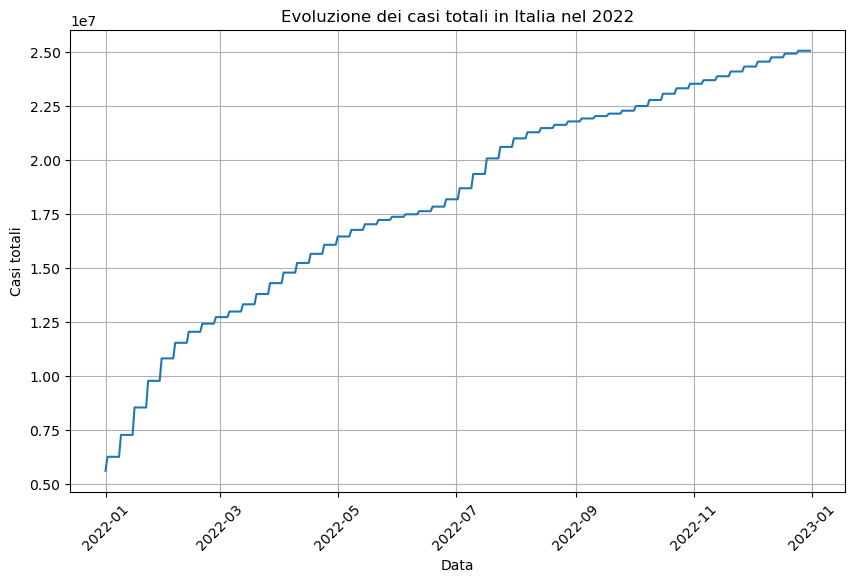

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['total_cases'])
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

•Selezionare i dati relativi all'Italia nel 2022, e
-Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario)

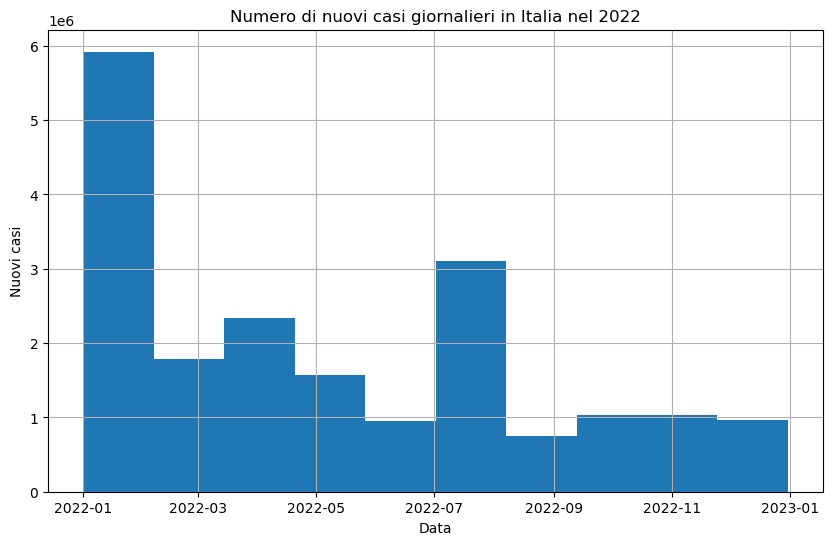

In [166]:
plt.figure(figsize=(10, 6))
plt.hist(italia_2022['date'], weights=italia_2022['new_cases'])
plt.title('Numero di nuovi casi giornalieri in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.grid(True)
plt.show()

•-Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

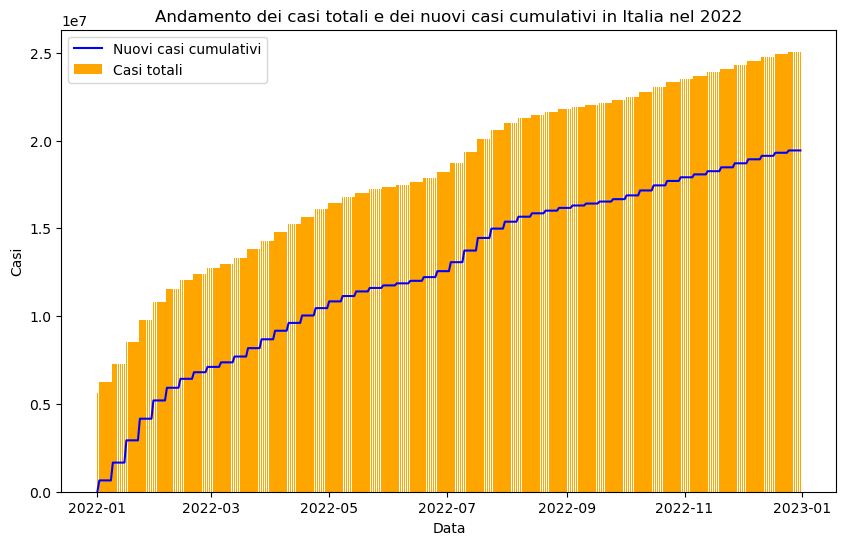

In [214]:
italia_2022['cumulative_new_cases'] = italia_2022['new_cases'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['cumulative_new_cases'], label='Nuovi casi cumulativi', color='blue')
plt.bar(italia_2022['date'], italia_2022['total_cases'], label='Casi totali', color='orange')
plt.title('Andamento dei casi totali e dei nuovi casi cumulativi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi')
plt.legend()
plt.show()

•Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

In [182]:
filtri = covid[(covid['location'].isin(['Italy', 'Germany', 'France']))
                & (covid['date'] >= '2022-05-01') & (covid['date'] <= '2023-04-30')]

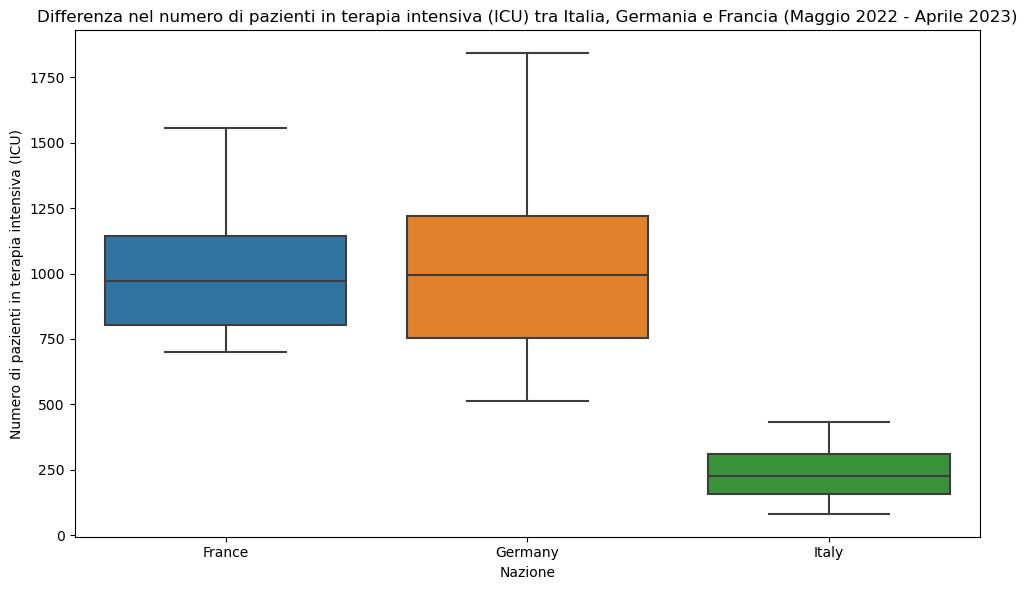

In [183]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=filtri)
plt.title('Differenza nel numero di pazienti in terapia intensiva (ICU) tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)')
plt.tight_layout()
plt.show()

•Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno

In [192]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387223 entries, 0 to 387222
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    387223 non-null  object        
 1   continent                                   368708 non-null  object        
 2   location                                    387223 non-null  object        
 3   date                                        387223 non-null  datetime64[ns]
 4   total_cases                                 348333 non-null  float64       
 5   new_cases                                   376280 non-null  float64       
 6   new_cases_smoothed                          375050 non-null  float64       
 7   total_deaths                                326109 non-null  float64       
 8   new_deaths                                  376589 non-null  float64      

In [193]:
filtri = covid[(covid['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (pd.to_datetime(covid.date).dt.year == 2023)]

ospitalizzati = filtri.groupby('location')['hosp_patients'].sum()

# Stampa la somma dei pazienti ospedalizzati per ogni nazione
print("Somma dei pazienti ospedalizzati per nazione nel 2023:")
print(ospitalizzati)

Somma dei pazienti ospedalizzati per nazione nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [196]:
valori_nulli = filtri[filtri['hosp_patients'].isnull()]
print("Dati nulli:")
print(valori_nulli)

Dati nulli:
       iso_code continent location       date  total_cases  new_cases  \
117699      FRA    Europe   France 2023-04-01   38588428.0        0.0   
117700      FRA    Europe   France 2023-04-02   38645710.0    57282.0   
117701      FRA    Europe   France 2023-04-03   38645710.0        0.0   
117702      FRA    Europe   France 2023-04-04   38645710.0        0.0   
117703      FRA    Europe   France 2023-04-05   38645710.0        0.0   
...         ...       ...      ...        ...          ...        ...   
327792      ESP    Europe    Spain 2023-12-27   13980340.0        NaN   
327793      ESP    Europe    Spain 2023-12-28   13980340.0        NaN   
327794      ESP    Europe    Spain 2023-12-29   13980340.0        NaN   
327795      ESP    Europe    Spain 2023-12-30   13980340.0        NaN   
327796      ESP    Europe    Spain 2023-12-31   13980340.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
117699            7799.000      16

Suggerimenti per gestire i dati nulli:

- Se i dati mancanti sono limitati e possono essere interpolati o sostituiti con il valore medio, potrebbe essere possibile gestirli.
- Tuttavia, se ci sono molti dati mancanti o se la loro sostituzione introduce un elevata incertezza, potrebbe essere meglio escluderli dall analisi.